In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.models import ResNet18_Weights
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [2]:
img_size= (448, 448)

In [3]:
img_path = r"D:\\Test\\MSFFO\dataset\\2007_000799.jpg"

In [4]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, img_size)
img.shape # (H, W, C)

(448, 448, 3)

In [5]:
img = transforms.ToTensor()(img)
x = img.unsqueeze(0)
x.shape

torch.Size([1, 3, 448, 448])

In [6]:
resnet = models.resnet18(weights=ResNet18_Weights.DEFAULT)
conv1 = resnet.conv1
bn1 = resnet.bn1
relu = resnet.relu
maxpool = resnet.maxpool
layer1 = resnet.layer1
layer2 = resnet.layer2
layer3 = resnet.layer3
layer4 = resnet.layer4

In [7]:
low_level = []

In [8]:
x = conv1(x)
x = bn1(x)
x = relu(x)
low = x
print(low.shape)

torch.Size([1, 64, 224, 224])


C:\Users\Binh An\AppData\Local\Temp\ipykernel_28612\2024699011.py:18: RuntimeWarning: invalid value encountered in divide
  feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())


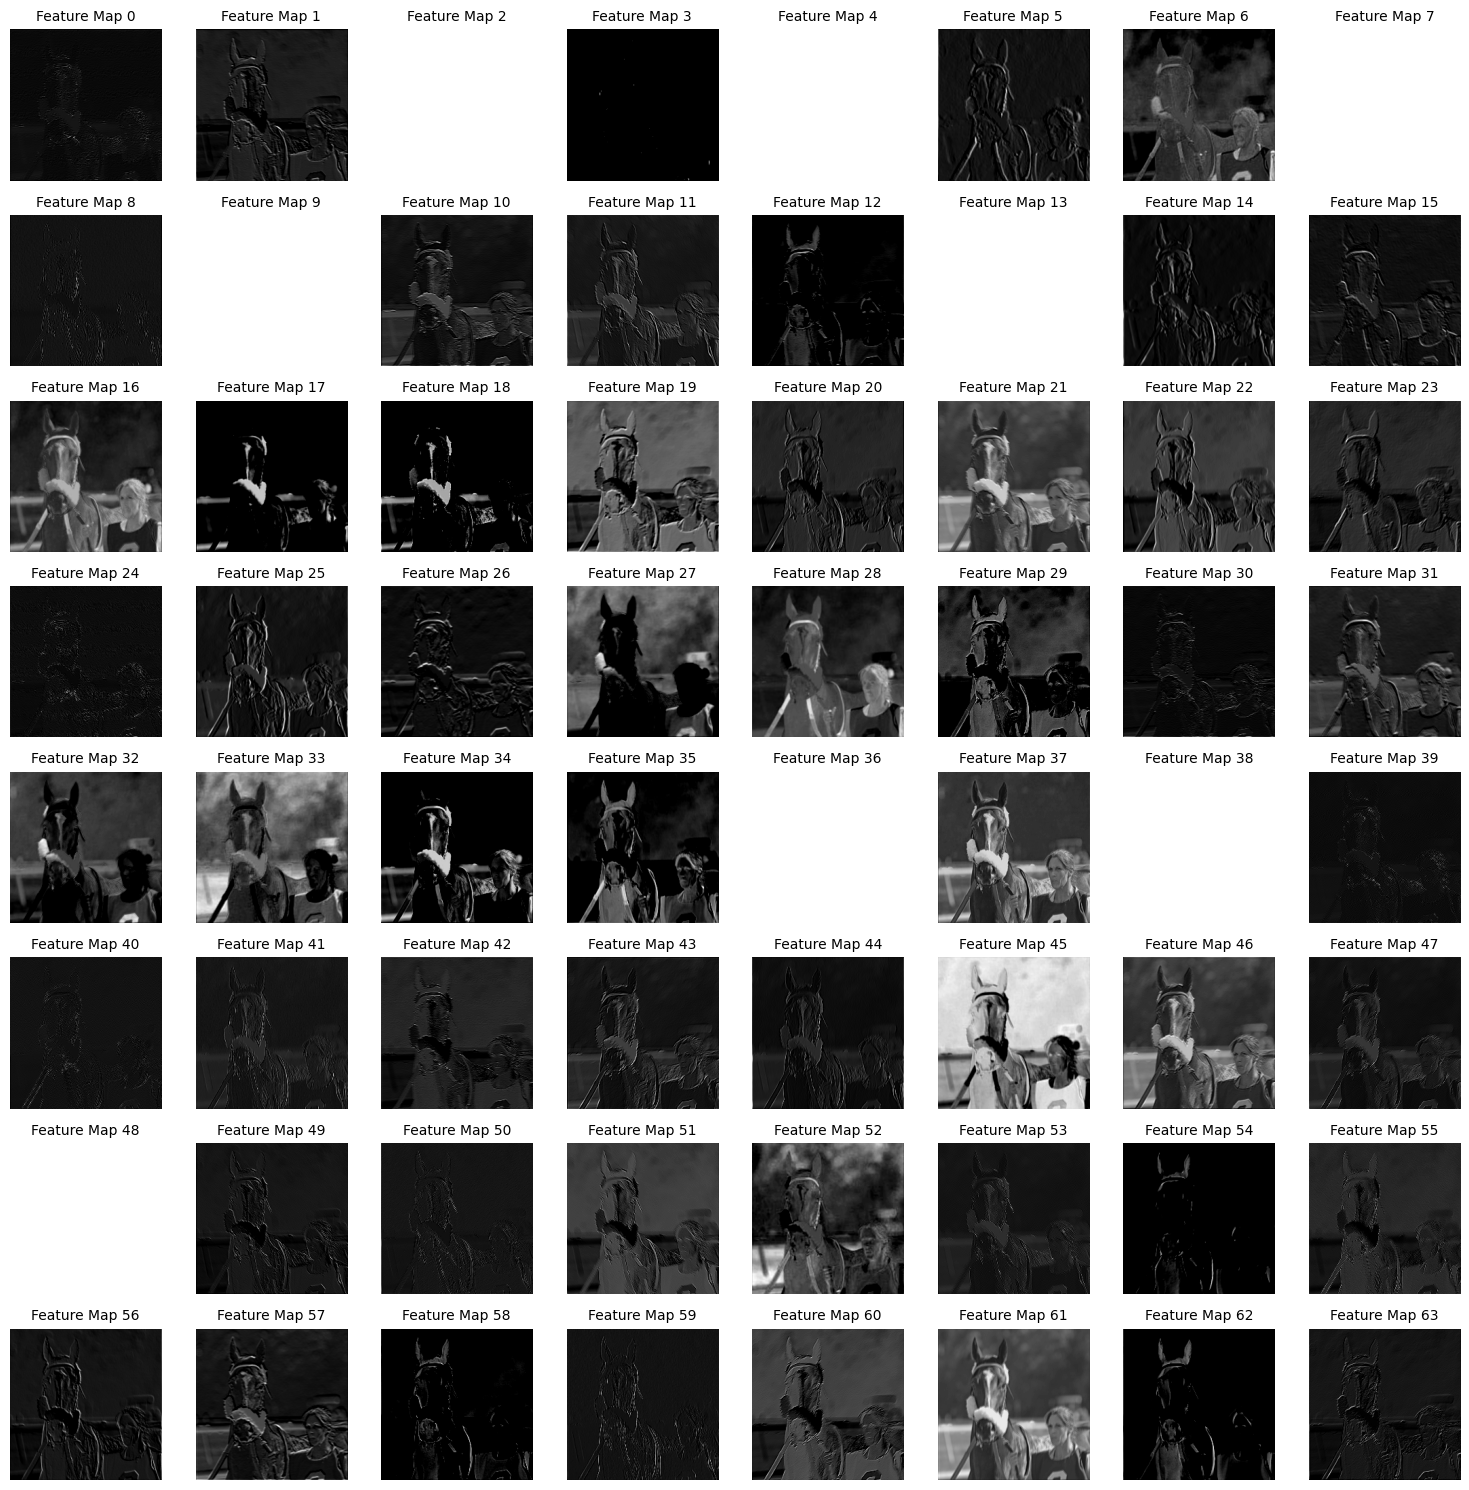

In [9]:
import matplotlib.pyplot as plt

# Loại bỏ chiều batch (batch_size=1), lấy tensor có kích thước (256, 30, 40)
low_display = low.squeeze(0)  # Kích thước: (256, 30, 40)

# Chuyển tensor về CPU và numpy để hiển thị
low_display = low_display.detach().cpu().numpy()  # Chuyển tensor sang numpy array

# Số kênh muốn hiển thị (chọn 16 kênh đầu tiên)
num_channels_to_display = 64

# Tạo lưới 4x4 để hiển thị 16 bản đồ đặc trưng
plt.figure(figsize=(15, 15))
for i in range(num_channels_to_display):
    plt.subplot(8, 8, i + 1)  # Tạo lưới 4x4
    feature_map = low_display[i]  # Lấy bản đồ đặc trưng thứ i
    # Chuẩn hóa giá trị về [0, 1] để hiển thị rõ hơn
    feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())
    plt.imshow(feature_map, cmap='gray')  # Hiển thị dưới dạng grayscale
    plt.title(f'Feature Map {i}', fontsize=10)
    plt.axis('off')  # Ẩn trục tọa độ
plt.tight_layout()
plt.show()

In [10]:
low_level.append(low)
print(low_level)

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.1776, 0.2658, 0.3722,  ..., 0.4172, 0.3700, 0.3006],
          [0.2652, 0.2455, 0.2046,  ..., 0.1463, 0.1765, 0.1758],
          ...,
          [0.2885, 0.2749, 0.3442,  ..., 0.3454, 0.2645, 0.2660],
          [0.3012, 0.2918, 0.3417,  ..., 0.2964, 0.3254, 0.3329],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.4503, 0.2364, 0.2237,  ..., 0.1883, 0.1781, 0.0000],
          [0.5941, 0.3482, 0.3277,  ..., 0.3034, 0.3292, 0.1147],
          ...,
          [1.1019, 0.4474, 0.3120,  ..., 0.4953, 0.3988, 0.1169],
          [1.0665, 0.4939, 0.3702,  ..., 0.2613, 0.5218, 0.1701],
          [1.1459, 0.6471, 0.4349,  ..., 0.0000, 0.2729, 0.0760]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 

In [11]:
x = maxpool(x)
print(x.shape)
x = layer1(x)
print(x.shape)
x = layer2(x)
mid = x
print(mid.shape)

torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 56, 56])


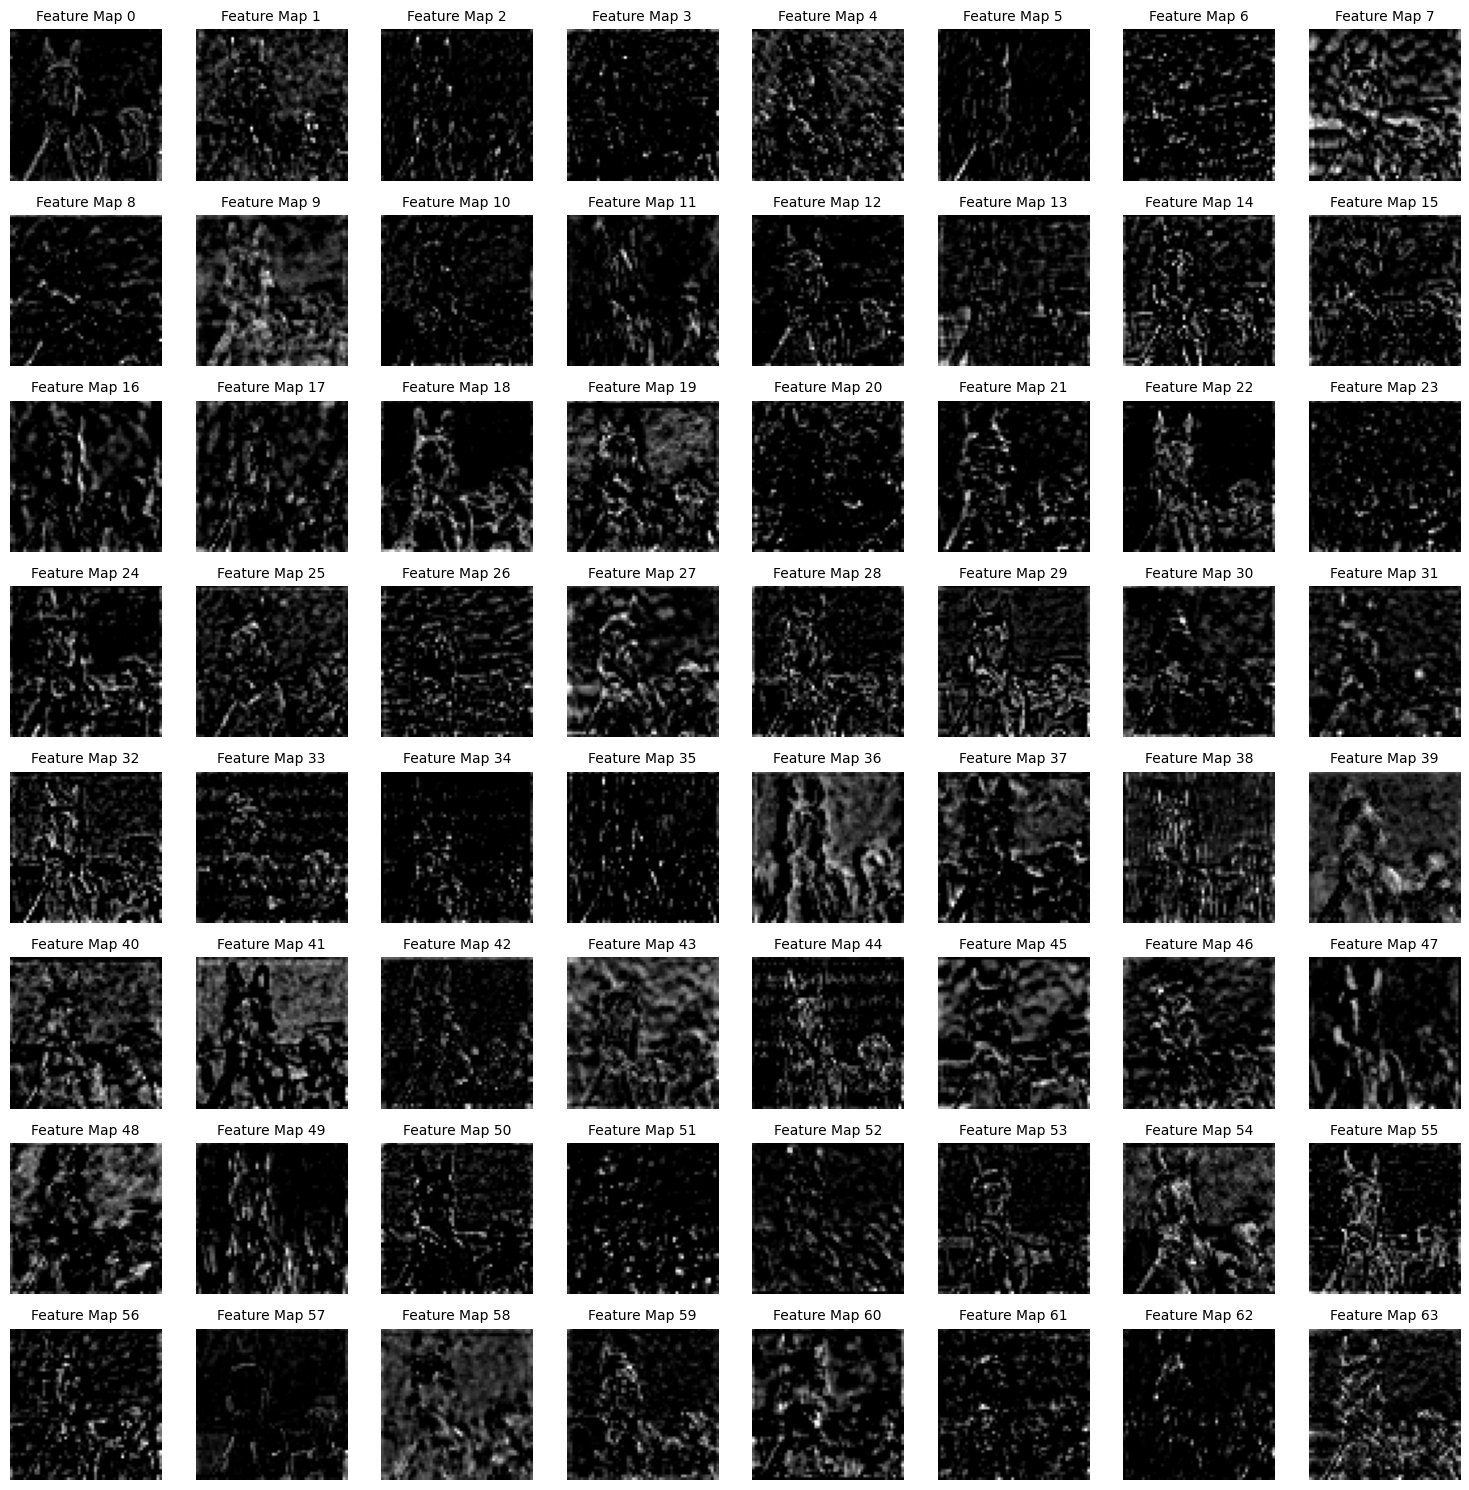

In [12]:
import matplotlib.pyplot as plt

# Loại bỏ chiều batch (batch_size=1), lấy tensor có kích thước (256, 30, 40)
mid_display = mid.squeeze(0)  # Kích thước: (256, 30, 40)

# Chuyển tensor về CPU và numpy để hiển thị
mid_display = mid_display.detach().cpu().numpy()  # Chuyển tensor sang numpy array

# Số kênh muốn hiển thị (chọn 16 kênh đầu tiên)
num_channels_to_display = 64

# Tạo lưới 4x4 để hiển thị 16 bản đồ đặc trưng
plt.figure(figsize=(15, 15))
for i in range(num_channels_to_display):
    plt.subplot(8, 8, i + 1)  # Tạo lưới 4x4
    feature_map = mid_display[i]  # Lấy bản đồ đặc trưng thứ i
    # Chuẩn hóa giá trị về [0, 1] để hiển thị rõ hơn
    feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())
    plt.imshow(feature_map, cmap='gray')  # Hiển thị dưới dạng grayscale
    plt.title(f'Feature Map {i}', fontsize=10)
    plt.axis('off')  # Ẩn trục tọa độ
plt.tight_layout()
plt.show()

In [13]:
x = layer3(x)
x = layer4(x)

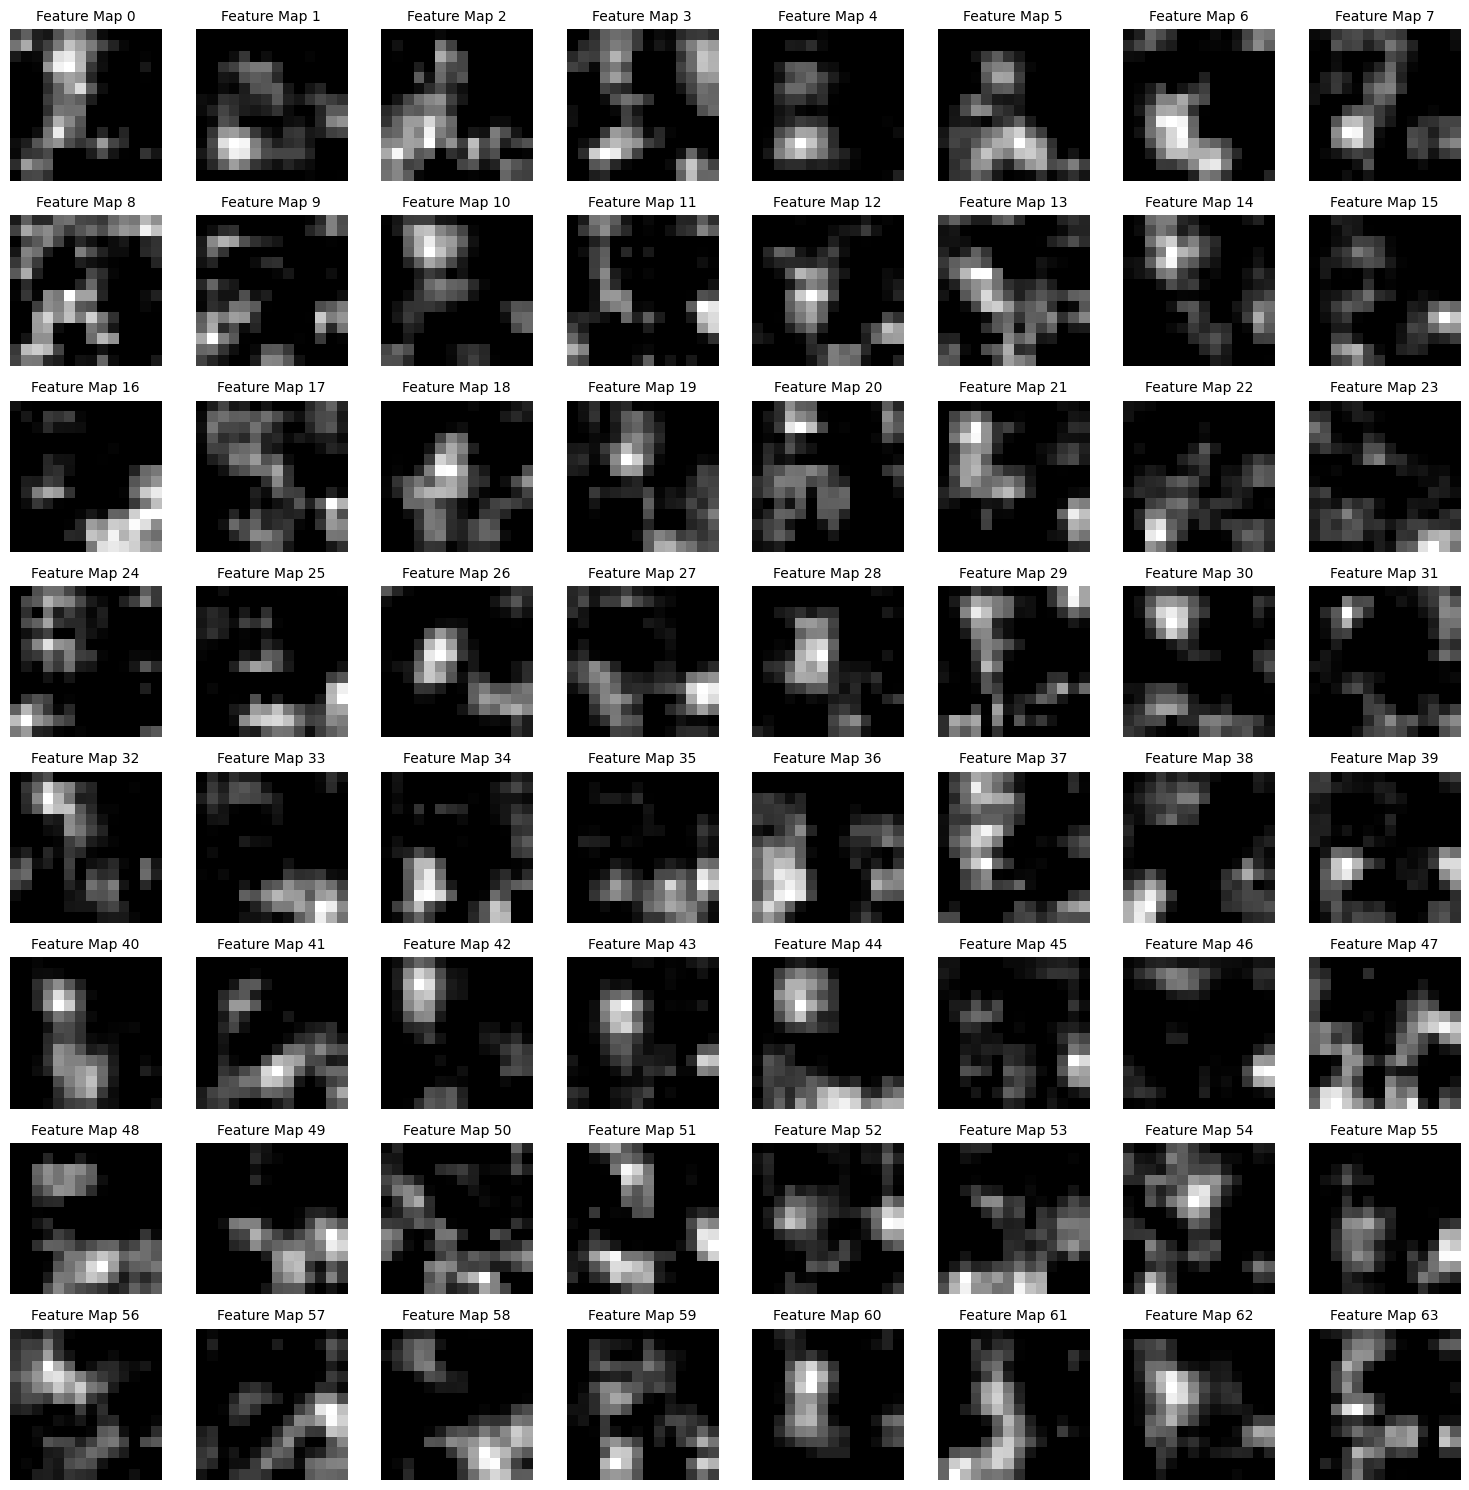

In [14]:
import matplotlib.pyplot as plt

# Loại bỏ chiều batch (batch_size=1), lấy tensor có kích thước (256, 30, 40)
x_display = x.squeeze(0)  # Kích thước: (256, 30, 40)

# Chuyển tensor về CPU và numpy để hiển thị
x_display = x_display.detach().cpu().numpy()  # Chuyển tensor sang numpy array

# Số kênh muốn hiển thị (chọn 16 kênh đầu tiên)
num_channels_to_display = 64

# Tạo lưới 4x4 để hiển thị 16 bản đồ đặc trưng
plt.figure(figsize=(15, 15))
for i in range(num_channels_to_display):
    plt.subplot(8, 8, i + 1)  # Tạo lưới 4x4
    feature_map = x_display[i]  # Lấy bản đồ đặc trưng thứ i
    # Chuẩn hóa giá trị về [0, 1] để hiển thị rõ hơn
    feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())
    plt.imshow(feature_map, cmap='gray')  # Hiển thị dưới dạng grayscale
    plt.title(f'Feature Map {i}', fontsize=10)
    plt.axis('off')  # Ẩn trục tọa độ
plt.tight_layout()
plt.show()